<a href="https://colab.research.google.com/github/mazdah/colab_practice/blob/main/%EC%A7%81%EC%9E%A5%EC%9D%B8%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D13_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 문제를 정의하는 방식과 유형들



---

### 1) Library와 Data import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

In [3]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


---

#### ▶︎ Feature Description
- TOWN : 지역 이름
- LON, LAT : 위도와 경도
- CMEDV : 해당 지역의 집값 (중간값)
- CRIM : 근방의 범죄율
- ZN : 주택지 비율
- INDUS : 상업적 비지니스에 활용되지 않는 농지 면적
- CHAS : 경계선에 강이 있는지 여부
- NOX :  산화질소 농도
- RM : 각 집의 평균 방의 개수
- AGE : 1940년 이전에 건설된 비율
- DIS : 5개의 보스턴 고용센터와의 거리에 따른 가중치 부여
- RAD : radial 고속도로와의 접근성 지수
- TAX : 10000달러당 재산세
- PTRATIO : 지역별 학생-교사 비율
- B : 지역의 흑인 지수 (1000(B * 0.63)^2), B는 흑인의 비율
- LSTAT : 빈곤층의 비율

---

### 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

#### 2-1) 회귀 분석 종속(목표) 변수 탐색

- 데이터셋 기본 정보 탐색

In [11]:
# 데이터 셋 전체 크기 확인
df.shape

(506, 17)

In [12]:
# 각 피쳐의 결측치 확인 (info() 함수로도 확인 가능)
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [13]:
# 각 피쳐의 데이터 타입 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


- CMEDV 피쳐 탐색

In [14]:
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

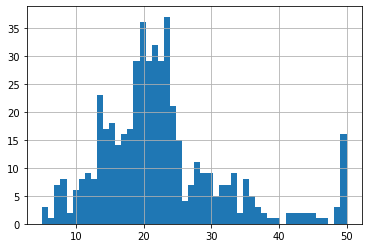

In [16]:
df['CMEDV'].hist(bins=50)

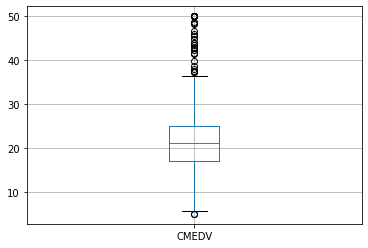

In [17]:
df.boxplot(column=["CMEDV"])

---

#### 2-2) 회귀 분석 설명 변수 탐색

- 설명 변수들의 분포 탐색

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


<function matplotlib.pyplot.show>

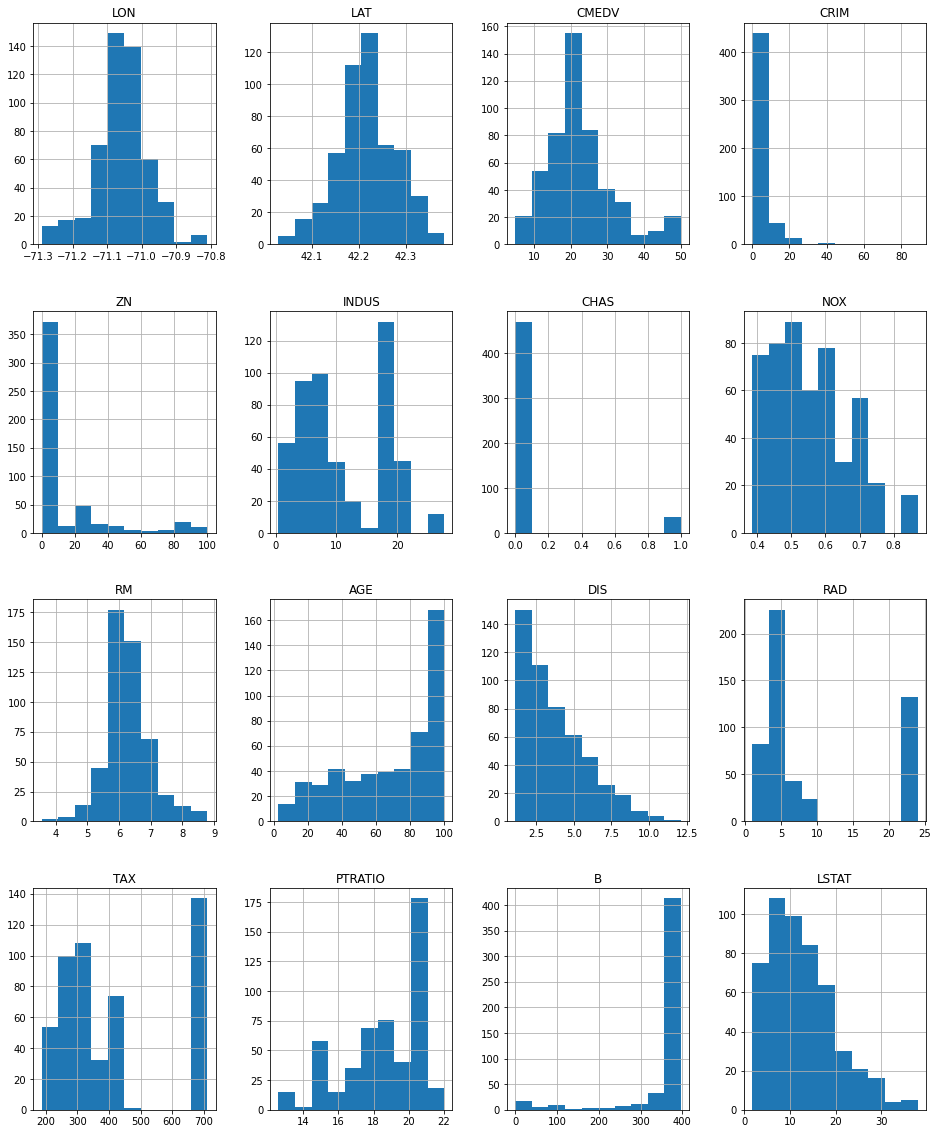

In [20]:
numerical_columns = df.loc[:, df.dtypes != 'object']
fig = plt.figure(figsize=(16, 20))
ax = fig.gca()

df[numerical_columns.columns].hist(ax=ax)
plt.show

- 설명 변수들의 상관관계 탐색 (heatmap)

In [23]:
cols = numerical_columns.columns
corr = df[cols].corr(method='pearson')
corr

,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
LON,1.000000,0.143054,-0.322947,0.065101,-0.218081,0.062702,-0.175619,0.160871,-0.257110,0.204739,-0.011243,0.034067,0.050663,0.312602,-0.018300,0.195630
LAT,0.143054,1.000000,0.006826,-0.084293,-0.129667,-0.041093,-0.044726,-0.068600,-0.069317,0.079035,-0.082981,-0.207013,-0.167718,-0.004527,0.105254,0.045660
CMEDV,-0.322947,0.006826,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,0.065101,-0.084293,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.218081,-0.129667,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.062702,-0.041093,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.175619,-0.044726,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.160871,-0.068600,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.257110,-0.069317,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.204739,0.079035,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339


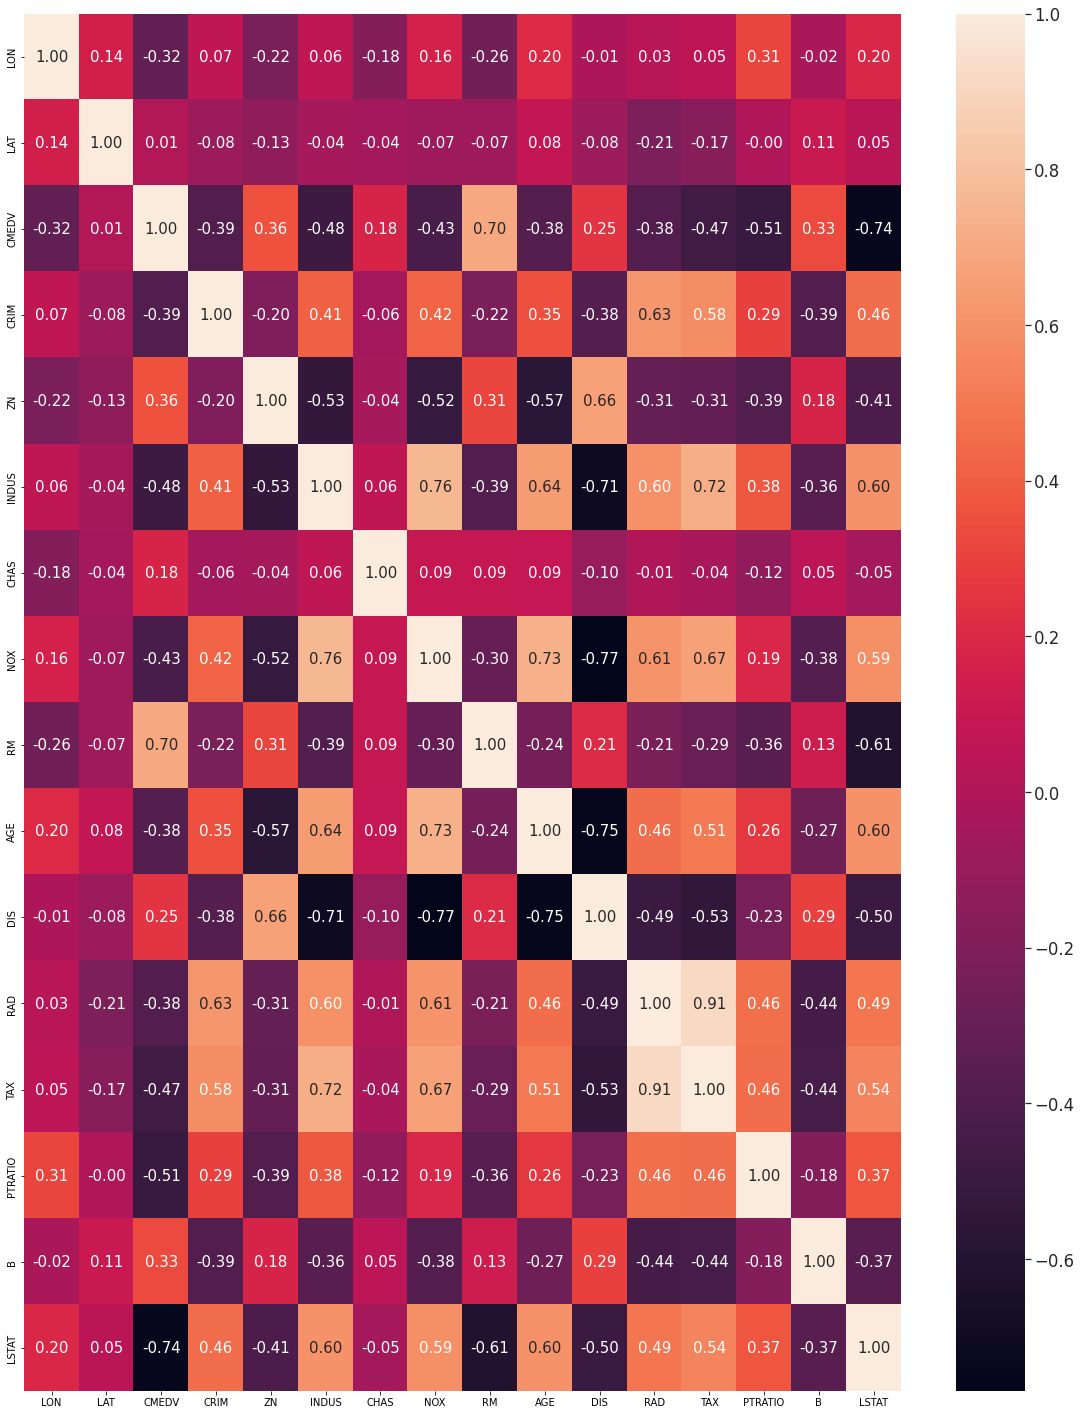

In [26]:
fig = plt.figure(figsize=(16, 20))
ax = fig.gca()

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, annot=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols, ax=ax)
plt.tight_layout()
plt.show()